In [1]:
## 导入需要的库
import numpy as np
import pandas as pd
import math
import os
import random
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [3]:
## 我们模型的聚类结果如下所示
lb1 = [20, 1, 4, 5, 6, 9, 16, 22, 25, 34, 36, 38, 43, 44, 46, 49]
lb2 = [12, 17, 27, 2, 3, 8, 10, 21, 23, 24, 26, 29, 30, 31, 33, 37, 47, 48]
lb3 = [0, 7, 11, 13, 14, 15, 18, 19, 28, 32, 35, 39, 40, 41, 42, 45]

## K-means聚类结果
A1 = [4, 5, 7, 14, 15, 18, 31, 32, 36, 37, 41, 45]
A2 = [0, 2, 3, 6, 8, 9, 10, 11, 12, 13, 16, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 38, 39, 42, 43, 44, 46, 47, 48, 49]
A3 = [1, 17, 19, 21, 40]

# 三支聚类结果
B1 = [0, 5, 9, 10, 19, 23, 26, 29, 30, 32, 35, 36, 41, 43, 45, 48]
B2 = [2, 3, 4, 8, 11, 12, 13, 14, 15, 17, 18, 20, 24, 27, 31, 33, 34, 37, 38, 39, 40, 42, 44, 46, 47, 49]
B3 = [1, 6, 7, 16, 21, 22, 25, 28]

# 基于遗憾理论的灰度关联聚类结果
C1 = [2, 3, 6, 9, 11, 18, 19, 21, 23, 30, 32, 33, 35, 37, 38, 41, 46]
C2 = [0, 1, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17, 20, 22, 24, 25, 26, 27, 28, 29, 31, 34, 36, 39, 40, 42, 43, 44, 45, 47, 48, 49]

# 亲和传播聚类结果
D1 = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
D2 = [2, 6, 21, 26]

In [4]:
def getEuclidean(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += (point1[i] - point2[i]) ** 2
    return math.sqrt(dist)

In [6]:
## 读取数据
data = pd.read_csv("归一化数据.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.542315,0.631639,0.537692,0.657919,0.425744,0.533389,0.432409,0.655109,0.533334,0.454244,...,0.618472,0.499274,0.496539,0.506831,0.472601,0.540841,0.522418,0.551274,0.548531,0.472711
1,0.447122,0.625455,0.506848,0.492007,0.638708,0.775372,0.466275,0.486687,0.521557,0.493482,...,0.505660,0.553300,0.521557,0.553096,0.552896,0.442834,0.441554,0.569715,0.505557,0.521557
2,0.274827,0.525519,0.597789,0.462946,0.515822,0.387707,0.535493,0.275107,0.520282,0.478059,...,0.616526,0.434512,0.548418,0.433224,0.753095,0.458347,0.570396,0.614078,0.525519,0.761053
3,0.513593,0.519015,0.508134,0.414162,0.502106,0.602256,0.390319,0.603137,0.596409,0.702611,...,0.107530,0.699745,0.002770,0.008172,0.471095,0.630606,0.550657,0.816108,0.271831,0.147693
4,0.582469,0.490905,0.563069,0.358929,0.322298,0.591241,0.684933,0.445066,0.304304,0.519341,...,0.567308,0.608957,0.668854,0.452971,0.441484,0.482484,0.503411,0.587869,0.503570,0.556060


In [7]:
n = len(data)
dist = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dist[i][j] = getEuclidean(data.iloc[i][1490:], data.iloc[j][1490:])

In [8]:
dist1 = np.zeros((n,n))
for i in range(n):
    a = min(dist[i])
    b = max(dist[i])
    for j in range(n):
        dist1[i][j]=(dist[i][j]-a)/(b-a)
dist1

array([[0.        , 0.20785489, 0.42182372, ..., 0.13501549, 0.16590476,
        0.15809049],
       [0.2078462 , 0.        , 0.38716111, ..., 0.16926789, 0.2318327 ,
        0.17232271],
       [0.36632099, 0.33623328, 0.        , ..., 0.32693255, 0.36364219,
        0.31081019],
       ...,
       [0.13689254, 0.17162831, 0.3817012 , ..., 0.        , 0.1662764 ,
        0.17138103],
       [0.1553494 , 0.21709189, 0.39209761, ..., 0.1535625 , 0.        ,
        0.22055285],
       [0.16649875, 0.18149552, 0.37693778, ..., 0.17802123, 0.24806596,
        0.        ]])

In [10]:
labels1 = [] 
for i in range(n):
    if i in lb1:
        labels1.append(0)
    elif i in lb2:
        labels1.append(1)
    else:
        labels1.append(2)
print(labels1)

[2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0]


In [11]:
labels2 = [] 
for i in range(n):
    if i in A1:
        labels2.append(0)
    elif i in A2:
        labels2.append(1)
    else:
        labels2.append(2)
print(labels2)

[1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1]


In [12]:
labels3 = [] 
for i in range(n):
    if i in B1:
        labels3.append(0)
    elif i in B2:
        labels3.append(1)
    else:
        labels3.append(2)
print(labels3)

[0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]


In [13]:
labels4 = [] 
for i in range(n):
    if i in C1:
        labels4.append(0)
    else:
        labels4.append(1)
print(labels4)

[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]


In [14]:
labels5 = [] 
for i in range(n):
    if i in D1:
        labels5.append(0)
    else:
        labels5.append(1)
print(labels5)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# 计算轮廓系数
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(dist1, labels1)
silhouette_avg2 = silhouette_score(dist1, labels2)
silhouette_avg3 = silhouette_score(dist1, labels3)
silhouette_avg4 = silhouette_score(dist1, labels4)
silhouette_avg5 = silhouette_score(dist1, labels5)
print("轮廓系数:", silhouette_avg1)
print("轮廓系数:", silhouette_avg2)
print("轮廓系数:", silhouette_avg3)
print("轮廓系数:", silhouette_avg4)
print("轮廓系数:", silhouette_avg5)

轮廓系数: -0.057456434271573265
轮廓系数: -0.10870054158281299
轮廓系数: -0.07109938016925876
轮廓系数: 0.18598470476521314
轮廓系数: 0.18951544886094818


In [16]:
from sklearn.metrics import calinski_harabaz_score
score1 = calinski_harabaz_score(dist1, labels1)
score2 = calinski_harabaz_score(dist1, labels2)
score3 = calinski_harabaz_score(dist1, labels3)
score4 = calinski_harabaz_score(dist1, labels4)
score5 = calinski_harabaz_score(dist1, labels5)
print("Calinski-Harabasz指数:", score1)
print("Calinski-Harabasz指数:", score2)
print("Calinski-Harabasz指数:", score3)
print("Calinski-Harabasz指数:", score4)
print("Calinski-Harabasz指数:", score5)

Calinski-Harabasz指数: 1.3439677125443246
Calinski-Harabasz指数: 0.8915798656601203
Calinski-Harabasz指数: 0.4794539191592851
Calinski-Harabasz指数: 10.221534907828334
Calinski-Harabasz指数: 3.55815458557504


D:\shuju\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
D:\shuju\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
D:\shuju\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
D:\shuju\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is dep

In [18]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_blobs

# 生成聚类数据
X, _ = make_blobs(n_samples=50, n_features=1500)

# 定义评价指标列表
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_scores = []

from sklearn.metrics import pairwise_distances
import numpy as np

def calculate_dunn_index(X, labels):
    """
    计算 Dunn 指数：最小簇间距离除以最大簇内距离的比值
    参数：
      - X：样本数据矩阵，形状为 (n_samples, n_features)
      - labels：聚类结果标签，形状为 (n_samples,)
    返回：
      - dunn_index：Dunn 指数
    """

    # 计算距离矩阵
    distances = pairwise_distances(X)

    # 根据聚类结果计算簇内距离和簇间距离
    cluster_distances = []
    for i in np.unique(labels):
        cluster_i_indices = np.where(labels == i)[0]
        cluster_i_distances = distances[cluster_i_indices][:, cluster_i_indices]
        cluster_distances.append(cluster_i_distances)

    cluster_distances = np.concatenate(cluster_distances)

    # 计算最小簇间距离
    min_intercluster_distance = np.min(cluster_distances[cluster_distances > 0])

    # 计算最大簇内距离
    max_intracluster_distance = np.max(np.array([np.max(cluster_distance) for cluster_distance in cluster_distances]))

    # 计算 Dunn 指数
    dunn_index = min_intercluster_distance / max_intracluster_distance

    return dunn_index

# 随机生成五个聚类模型并计算评价指标
for _ in range(5):
    # 聚类算法
    kmeans = KMeans(n_clusters=5)
    agg = AgglomerativeClustering(n_clusters=5)
    labels_kmeans = kmeans.fit_predict(X)
    labels_agg = agg.fit_predict(X)

    # 计算轮廓系数
    silhouette_kmeans = silhouette_score(X, labels_kmeans)
    silhouette_agg = silhouette_score(X, labels_agg)
    silhouette_scores.append([silhouette_kmeans, silhouette_agg])

    # 计算Calinski-Harabasz指数
    calinski_harabasz_kmeans = calinski_harabasz_score(X, labels_kmeans)
    calinski_harabasz_agg = calinski_harabasz_score(X, labels_agg)
    calinski_harabasz_scores.append([calinski_harabasz_kmeans, calinski_harabasz_agg])

    # 计算Davies-Bouldin指数
    davies_bouldin_kmeans = davies_bouldin_score(X, labels_kmeans)
    davies_bouldin_agg = davies_bouldin_score(X, labels_agg)
    davies_bouldin_scores.append([davies_bouldin_kmeans, davies_bouldin_agg])

    # 计算Dunn指数
    dunn_kmeans = calculate_dunn_index(X, labels_kmeans)
    dunn_agg = calculate_dunn_index(X, labels_agg)
    dunn_scores.append([dunn_kmeans, dunn_agg])

# 将四个评价指标转化为越大越好的形式，即通过取相反数实现
silhouette_scores = [[-score[0], -score[1]] for score in silhouette_scores]
calinski_harabasz_scores = [[-score[0], -score[1]] for score in calinski_harabasz_scores]
davies_bouldin_scores = [[-score[0], -score[1]] for score in davies_bouldin_scores]
dunn_scores = [[-score[0], -score[1]] for score in dunn_scores]

# 输出评价指标结果
print("轮廓系数：", silhouette_scores)
print("Calinski-Harabasz指数：", calinski_harabasz_scores)
print("Davies-Bouldin指数：", davies_bouldin_scores)
print("Dunn指数：", dunn_scores)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

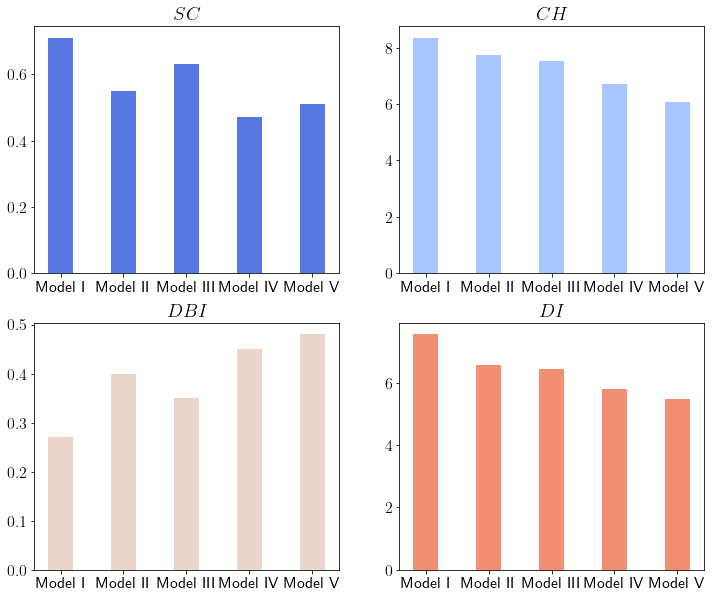

In [22]:
X = ('Model I', 'Model II', 'Model III', 'Model IV', 'Model V') 
# X = ('I', 'II', 'III', 'IV', 'V') 
Y1 = [0.71, 0.55, 0.63, 0.47, 0.51]
Y2 = [8.35, 7.75, 7.54, 6.72, 6.08]
Y3 = [0.27, 0.40, 0.35, 0.45, 0.48]
Y4 = [7.55, 6.56, 6.44, 5.78, 5.46]
plt.rcParams['figure.figsize'] = (12.0, 10.0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

means = [5, 15, 25, 35, 45]
colormap = plt.get_cmap('coolwarm')
colors = colormap(np.linspace(0.1, 1, len(means)))

# 按两行三咧显示
a = subplot(2,2,1) #在第一窗口显示
a.bar(X,Y1, width=0.4, color = colors[0], label = '$SC$')
plt.title("$SC$") 
b = subplot(2,2,2) #在第二个窗口显示
b.bar(X,Y2, width=0.4, color = colors[1], label = '$CH$' )
plt.title("$CH$") 
# plt.legend()
c = subplot(2,2,3)
c.bar(X,Y3, width=0.4, color = colors[2], label = '$DBI$')
plt.title("$DBI$") 
d = subplot(2,2,4) 
d.bar(X,Y4, width=0.4, color = colors[3], label = '$DI$')
plt.title("$DI$")
savefig("聚类比较1.jpg", dpi=300, bbox_inches='tight')
show()